### California Housing
- use a dataset from sklearn (https://scikit-learn.org/dev/datasets/real_world.html#california-housing-dataset)
- apply knowledge to import, review, describe, clean and also handle with missing data 
- attribute information (8 predictive attribures and the target column)
    - MedInc median income in block group
    - HouseAge median house age in block group
    - AveRooms average number of rooms per household
    - AveBedrms average number of bedrooms per household
    - Population block group population
    - AveOccup average number of household members
    - Latitude block group latitude
    - Longitude block group longitude
    - Target price

In [3]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import fetch_california_housing

In [ ]:
# check data

ca_housing = fetch_california_housing()
print(ca_housing.data.shape, ca_housing.target.shape)

(20640, 8) (20640,)


In [7]:
print(ca_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
len(ca_housing.feature_names)

8

In [10]:
# import data to a dataframe

data = pd.DataFrame(data = np.c_[ca_housing['data'], ca_housing['target']], columns = ca_housing['feature_names'] + ['target'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
data.shape

(20640, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### <font color='Green'>Review data</font>

- There is no missing value.
- It is a scew as the dispersion from 6.052381 to 141.909091 in AveRooms (average number of bedrooms per household) column.
- It is a scew as the dispersion from 1725.000000 to 35682.000000 in Population (block group population) column.
- It is a scew as the dispersion from 3.282261 to 1243.333333 in AveOccup (average number of household members) column.
- As a gap between the min and max of HouseAge, AveRooms, AveBedrms, Population, and AveOccup, data maybe scew or there is  the outlier over there


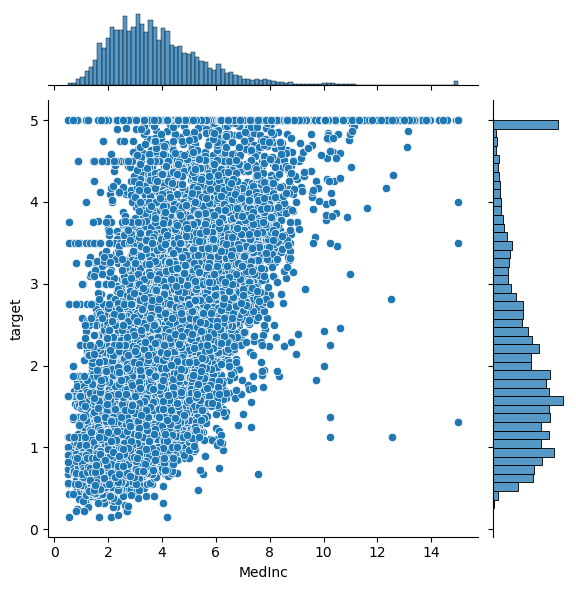

In [ ]:
# let's plot

sns.jointplot(data = data, x = 'MedInc', y = 'target');

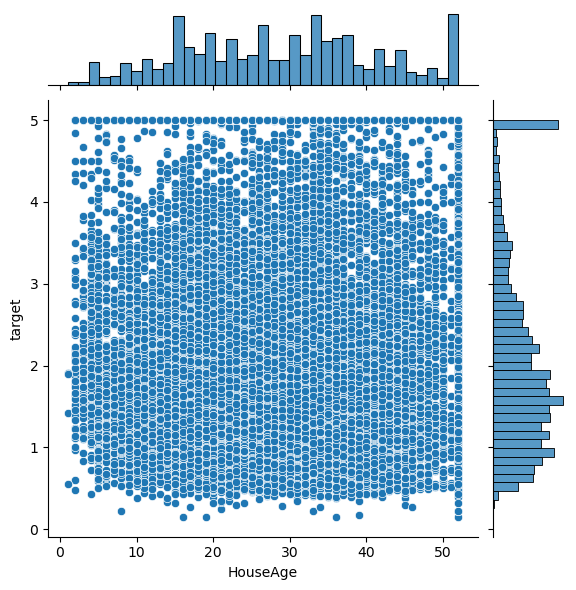

In [ ]:
sns.jointplot(data = data, x = 'HouseAge', y = 'target');

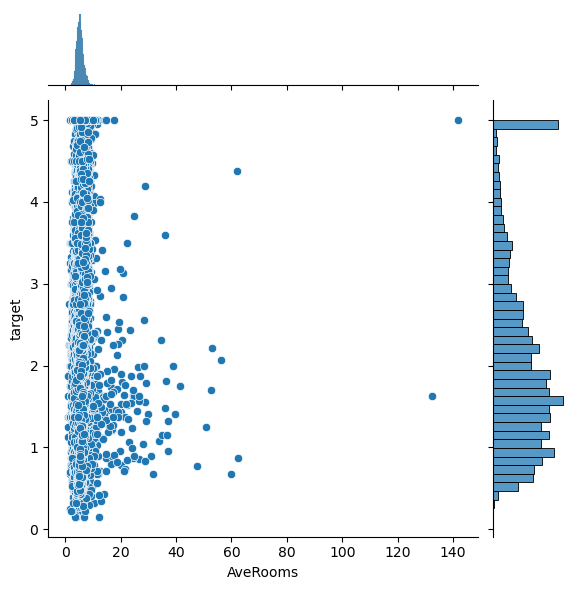

In [16]:
sns.jointplot(data = data, x = 'AveRooms', y = 'target');

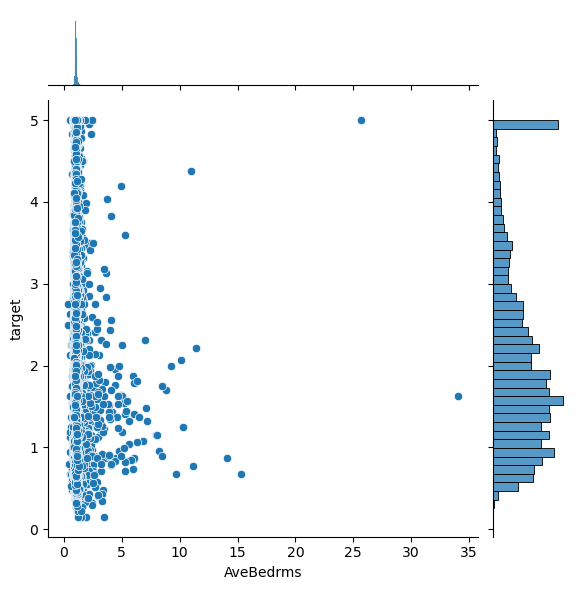

In [17]:
sns.jointplot(data = data, x = 'AveBedrms', y = 'target');

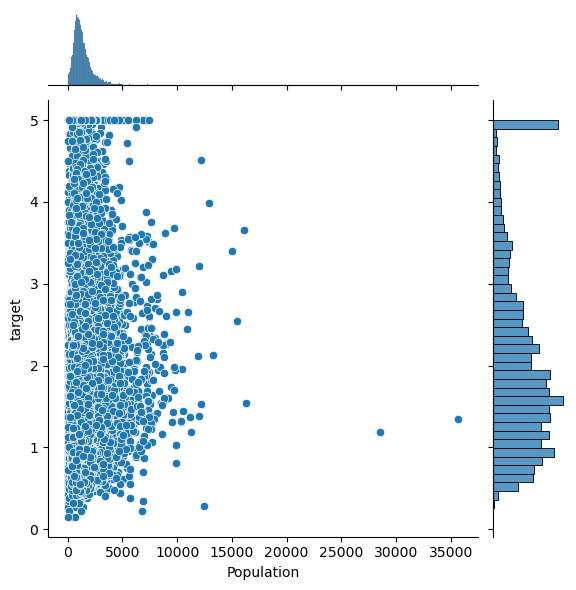

In [18]:
sns.jointplot(data = data, x = 'Population', y = 'target');

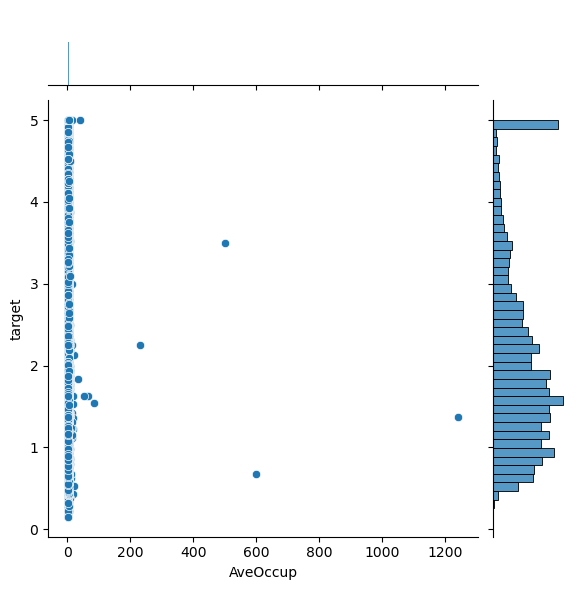

In [19]:
sns.jointplot(data = data, x = 'AveOccup', y = 'target');

In [21]:
# Please note that we can view the categorical variable by using countplot

# sns.countplot(data = data, x = 'variable/column name')

#### <font color='Green'>Review data</font>

- There are outliers data in MidInc, AveRooms, AveBedrms, Population, and AveOccup.
- Scewness or outliers in AveRooms, AveBedrms, Population, and AveOccup

In [22]:
# Let's handle with the outlier